# Task 4 Visualization 1

Node Link graph of artists and countries, to show links between them based on their popularity.

In [2]:
import networkx as nx
import nx_altair as nxa
import altair as alt
import pandas as pd

alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [3]:
rankings_file_path = "../../data/Daily_Ranking.csv"

In [17]:
df = pd.read_csv(rankings_file_path)

First, need to calculate the top artists in different countries.
Then, need to set the connect them together in the graph.
The width of the link represents the strength of the popularity, could encode maybe the proportional no. of streams that the artist gets?

In [5]:
df.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'Date', 'Region'], dtype='object')

In [13]:
regions = ['us', 'hk', 'gb']  #only these 3 regions for now
country_grouped = df.loc[df['Region'].isin(regions)]
country_grouped = country_grouped[country_grouped['Position'] <= 1]   #first extract the top ten songs
country_grouped = country_grouped.drop(columns=['Track Name', 'Streams', 'URL', 'Date'])
country_grouped = country_grouped.groupby(['Region', 'Artist']).count() #Basically calculates the number of days that that artists songs have combined stayed on the top 10 rankings in that country
print(country_grouped.shape)
country_grouped = country_grouped.add_suffix('_count').reset_index()
print("Unique Artists: {}".format(country_grouped['Artist'].nunique()))
print("Unique regions: {}".format(country_grouped['Region'].nunique()))
country_grouped.head()

(84, 1)
Unique Artists: 58
Unique regions: 3


,Region,Artist,Position_count
0,gb,Ariana Grande,86
1,gb,Ava Max,19
2,gb,"Baddiel, Skinner & Lightning Seeds",2
3,gb,Calvin Harris,102
4,gb,Clean Bandit,20


To join with the country names dataset

In [16]:
df_countries = pd.read_json("countries.json")
df_countries = df_countries.transpose()
df_countries = df_countries.drop(columns=['continent', 'capital', 'languages', 'native', 'phone', 'currency'])
df_countries = df_countries.rename(columns={'name':'Country'})
df_countries.head()
country_grouped['Region'] = country_grouped['Region'].str.upper()
country_grouped = country_grouped.merge(df_countries, how='inner', left_on='Region', right_index=True)
country_grouped.head()

,Region,Artist,Position_count,Country
0,GB,Ariana Grande,86,United Kingdom
1,GB,Ava Max,19,United Kingdom
2,GB,"Baddiel, Skinner & Lightning Seeds",2,United Kingdom
3,GB,Calvin Harris,102,United Kingdom
4,GB,Clean Bandit,20,United Kingdom


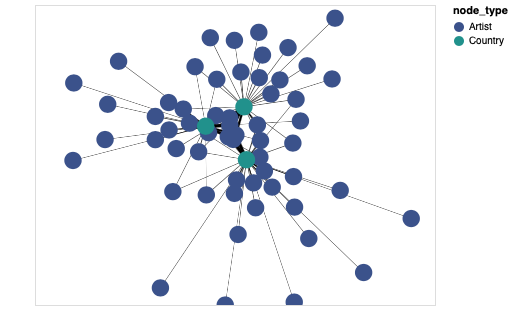

In [26]:
# Example of using the nx_altair library

# Generate a random graph

G = nx.Graph()
unique_artists = country_grouped['Artist'].unique()
unique_countries = country_grouped['Country'].unique()

for i in unique_artists:
    G.add_node(i, name=i, node_type='Artist')
    
for i in unique_countries:
    G.add_node(i, name=i, node_type='Country')

for i, row in country_grouped.iterrows():
    G.add_edge(row['Artist'], row['Country'], weight=row['Position_count'])

# Compute positions for viz.
pos = nx.spring_layout(G)

# Draw the graph using Altair
viz = nxa.draw_networkx(G, pos=pos, width='weight', node_color='node_type', cmap='viridis', node_tooltip=['name', 'node_type'])

# Show it as an interactive plot!
viz.interactive()

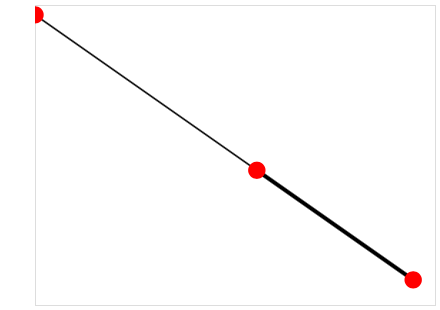

In [18]:
# Example of using the nx_altair library

# Generate a random graph
# G = nx.fast_gnp_random_graph(n=20, p=0.25)

G = nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_edge(2, 3, weight=5)
G.add_edge(2, 1, weight=2)

# Compute positions for viz.
pos = nx.spring_layout(G)

# Draw the graph using Altair
viz = nxa.draw_networkx(G, pos=pos, width='weight')

# Show it as an interactive plot!
viz.interactive()